Dataset: Fashion-MNIST
Model: CNN
FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
[    0             1           2          3       4         5        6        7         8        9       ]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
['Tişört/üst', 'Pantolon', 'Kazak', 'Elbise', 'Mont', 'Sandalet', 'Gömlek', 'Spor ayakkabı', 'Çanta', 'Bot']

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [33]:
#Load the Fashion-MNIST dataset for training and testing 
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = fashion_mnist.load_data()

#Normalize the data
X_train_mnist = X_train_mnist.astype('float32') / 255.0
X_test_mnist = X_test_mnist.astype('float32') / 255.0

#Reshape data to fit the model #adding channel dimension
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], 28, 28, 1) #28x28 and 1 channel
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], 28, 28, 1)

#One-hot encoding the labels this is necessary for categorical cross-entropy loss 
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

#Split the dataset for training and validation (test_size works for val_size) 
X_train_mnist, X_val_mnist, y_train_mnist, y_val_mnist = train_test_split(X_train_mnist, y_train_mnist, test_size=0.2, random_state=42)

#Build the CNN_mnist model
CNN_Model_mnist = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #32 filters; 3,3 Kernel size  #extracts features from images
    MaxPooling2D((2, 2)), #prevents overfitting
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(), #converts 3d to 1d
    Dense(256, activation='relu'), #256 neurons
    Dropout(0.5), #drops randomly
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax') #10 neurons for 10 clothing 
])


#Compile the CNN_mnist model
CNN_Model_mnist.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Print the model summary
CNN_Model_mnist.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 422,026 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Training control here!
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

#Train the CNN_mnist model
CNN_mnist=CNN_Model_mnist.fit(X_train_mnist, y_train_mnist, epochs=30, batch_size=64, validation_data=(X_val_mnist, y_val_mnist), callbacks=[early_stopping, reduce_lr])

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6352 - loss: 0.9695 - val_accuracy: 0.8406 - val_loss: 0.4149 - learning_rate: 0.0010
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8427 - loss: 0.4327 - val_accuracy: 0.8775 - val_loss: 0.3326 - learning_rate: 0.0010
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8764 - loss: 0.3446 - val_accuracy: 0.8914 - val_loss: 0.2941 - learning_rate: 0.0010
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8919 - loss: 0.3020 - val_accuracy: 0.8940 - val_loss: 0.2925 - learning_rate: 0.0010
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9009 - loss: 0.2799 - val_accuracy: 0.9002 - val_loss: 0.2717 - learning_rate: 0.0010
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9097 - loss: 0.2523 - val_accuracy: 0.9033 - val_loss: 0.2703 - learning_rate: 0.0010
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9171 - l

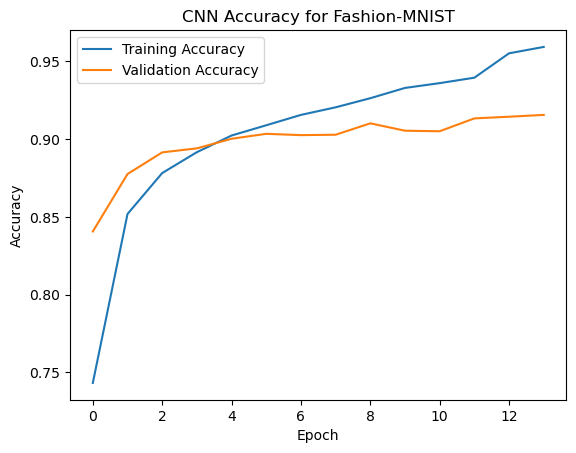

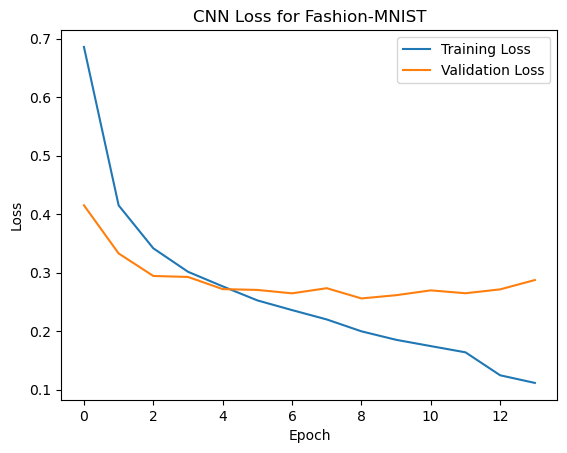

In [37]:
#Plot training and validation accuracy
plt.plot(CNN_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(CNN_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy for Fashion-MNIST')
plt.legend()
plt.show()

#Plot training and validation loss
plt.plot(CNN_mnist.history['loss'], label='Training Loss')
plt.plot(CNN_mnist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Loss for Fashion-MNIST')
plt.legend()
plt.show()

In [39]:
#Testing
test_loss_cnn_mnist, test_accuracy_cnn_mnist = CNN_Model_mnist.evaluate(X_test_mnist, y_test_mnist)
print("Test accuracy:", test_accuracy_cnn_mnist)
print("Test loss:", test_loss_cnn_mnist)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9024 - loss: 0.2823
Test accuracy: 0.902999997138977
Test loss: 0.27291935682296753


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


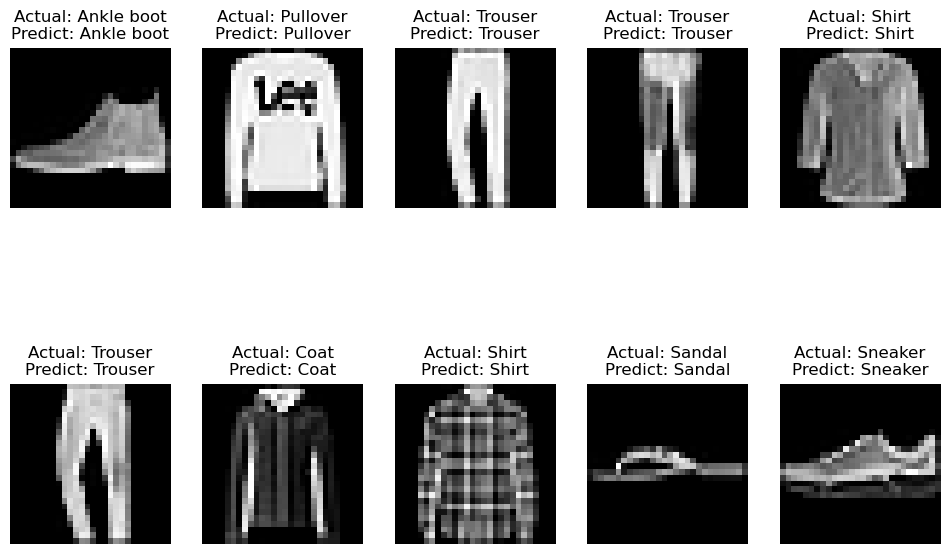

In [41]:
#Predictions
predictions = CNN_Model_mnist.predict(X_test_mnist)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_mnist, axis=1)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_mnist[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {class_labels[true_classes[i]]}\nPredict: {class_labels[predicted_classes[i]]}")
    plt.axis('off')

plt.show()

In [43]:
#Convert one-hot encoded labels to class labels for evaluation metrics below
y_test_labels = np.argmax(y_test_mnist, axis=1)

#Evaluation metrics
print("CNN_mnist Classification Report:\n", classification_report(y_test_labels, predicted_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, predicted_classes))
print("Accuracy:", accuracy_score(y_test_labels, predicted_classes))

CNN_mnist Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.89      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.86      0.81      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.71      0.71      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
 [[831   0  16  23   2   0 123   0   5   0]
 [  1 978   0  14   2   0   4   0   1   0]
 [ 16   0 891  10  39   0  43   0   1   0]
 [ 12   4   8 932  16   0  27   0   1   0]
 [  1   1  82  3